In [4]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]

In [5]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

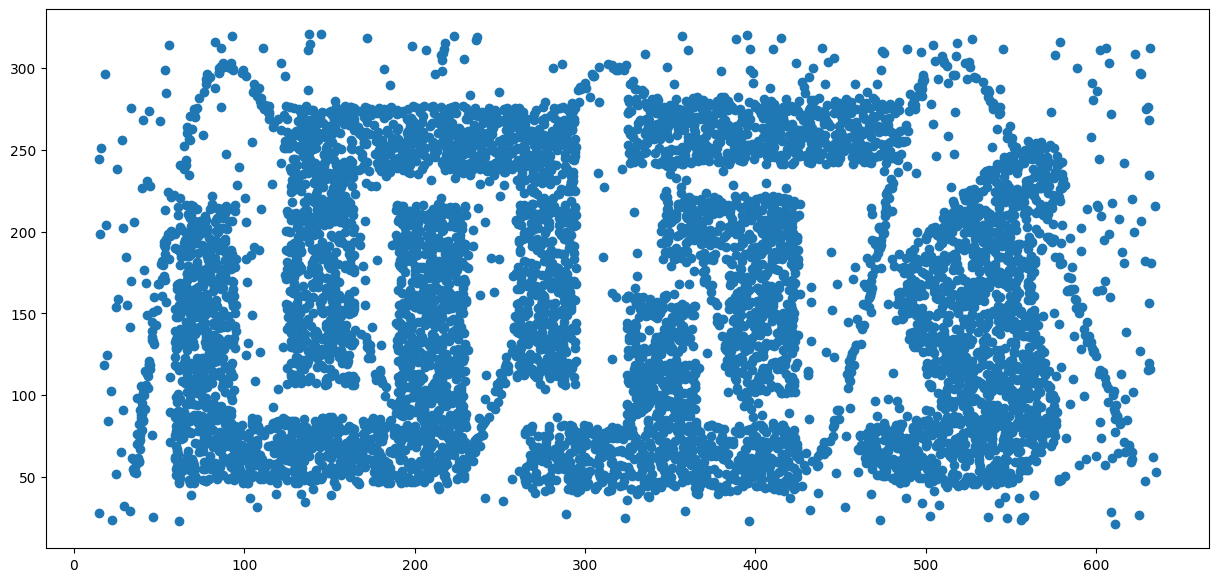

In [6]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [7]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,60)

In [8]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

4.139606888388297


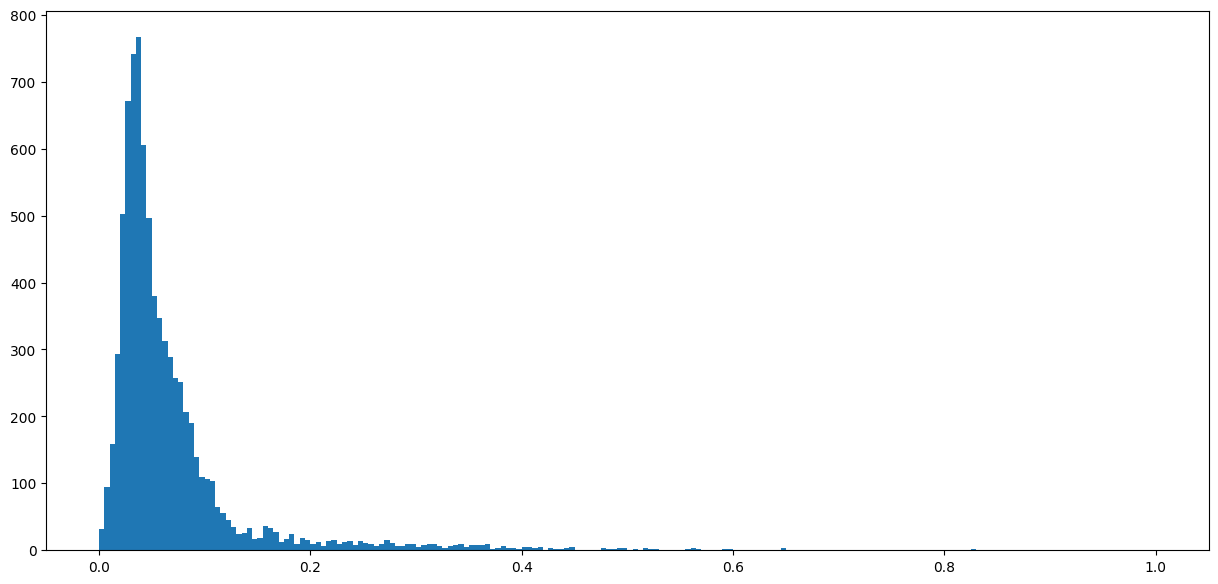

In [9]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [10]:
means = np.mean(arr)
inMean = 1/means

In [11]:
ker = -means*np.log(1-.88)
print(-means*np.log(1-.88))
f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
print(f)

0.14769317791635092
(0.88, 9.769962616701378e-15)


[ True  True  True ...  True  True  True]


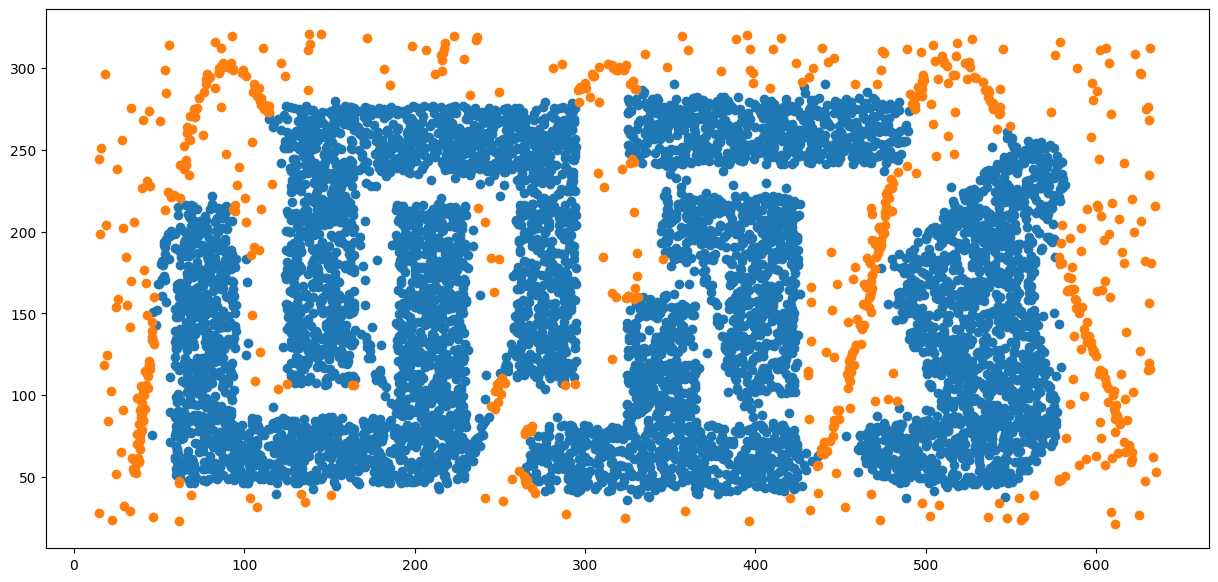

In [12]:
newArr = arr < ker
print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

In [13]:
print(X[newArr].shape,X[~newArr].shape)

(7354, 2) (646, 2)


In [14]:
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())

597 49
